<a href="https://colab.research.google.com/github/ryan9453/0602/blob/main/cifar10_gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
# ((x_train, y_train),(x_text, y_test))
load_data() # 觀察 發現data 在 tuple 裡
(x_train, y_train), (x_test, y_test) = load_data() # 確實抓到 目標data

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
# 觀察是否有抓到

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
names = [
    'airplane',										
    'automobile',										
    'bird',										
    'cat',										
    'deer',										
    'dog',										
    'frog',										
    'horse',										
    'ship',										
    'truck'
]

frog


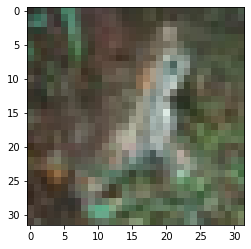

In [4]:
# 印出第一筆測試資料試試

import matplotlib.pyplot as plt
import random
idx = random.randint(0,4999)
ans = y_train[idx][0]
print(names[ans])
plt.imshow(x_train[idx])

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D # 用在把 2D 的東西組合成 3D
from tensorflow.keras.layers import Dense, Flatten, Dropout # Flatten 是攤平
layers = [
    # 3 * 3 * 3(一個) * 64 + 64(bias) = 1792
    Conv2D(64, 3, activation='relu', padding = 'same', input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個) * 128 + 128(bias) = 73586
    Conv2D(128, 3, activation='relu', padding = 'same'),
    MaxPooling2D(),
    Conv2D(256, 3, activation='relu', padding = 'same'),
    MaxPooling2D(),
    Conv2D(512, 3, activation='relu', padding = 'same'),
    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         1

In [6]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss = SparseCategoricalCrossentropy(),
            optimizer = Adam(),
            metrics = ['accuracy'])

In [7]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# validation_split: 切出一些驗證資料來做驗證(0.1: 54000筆資料訓練)
# epochs: 看幾輪(10輪: 5400 * 10)
# batch_size: 看了多少筆再做一次梯度調整(看圖片大小，圖片小:200, 圖片大: 20)
# 200batch, 10epoch: 54000 * 10 / 200 -> (梯度調整)
# verbose: 0(無聲) 1(完整) 2(必要)
callbacks = [
    EarlyStopping(patience = 5, restore_best_weights = True),
    ModelCheckpoint('cnn.h5', save_best_only = True)
]

model.fit(x_train_norm,
          y_train,
          validation_split=0.1,
          epochs=100,
          batch_size=200,
          verbose=2,
          callbacks=callbacks)

Epoch 1/100
225/225 - 36s - loss: 1.7328 - accuracy: 0.3533 - val_loss: 1.4400 - val_accuracy: 0.4676
Epoch 2/100
225/225 - 4s - loss: 1.3166 - accuracy: 0.5213 - val_loss: 1.2543 - val_accuracy: 0.5468
Epoch 3/100
225/225 - 4s - loss: 1.1274 - accuracy: 0.5936 - val_loss: 1.0794 - val_accuracy: 0.6088
Epoch 4/100
225/225 - 4s - loss: 0.9959 - accuracy: 0.6464 - val_loss: 0.9432 - val_accuracy: 0.6656
Epoch 5/100
225/225 - 4s - loss: 0.8924 - accuracy: 0.6844 - val_loss: 0.8832 - val_accuracy: 0.6864
Epoch 6/100
225/225 - 4s - loss: 0.8165 - accuracy: 0.7127 - val_loss: 0.8381 - val_accuracy: 0.7008
Epoch 7/100
225/225 - 4s - loss: 0.7431 - accuracy: 0.7367 - val_loss: 0.7419 - val_accuracy: 0.7372
Epoch 8/100
225/225 - 4s - loss: 0.6857 - accuracy: 0.7614 - val_loss: 0.7125 - val_accuracy: 0.7534
Epoch 9/100
225/225 - 4s - loss: 0.6229 - accuracy: 0.7836 - val_loss: 0.6780 - val_accuracy: 0.7684
Epoch 10/100
225/225 - 4s - loss: 0.5806 - accuracy: 0.7960 - val_loss: 0.6954 - val_accur

In [9]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6579 - accuracy: 0.7768


[0.6579182147979736, 0.7767999768257141]

In [10]:
print(y_test.shape)
# print(pre.shape)
# -1: 叫他幫你算 10000 * 1 = -1(?)
y_test_r = y_test.reshape(-1)
print(y_test_r.shape)

(10000, 1)
(10000,)


In [11]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# predict_proba -> predict
# predict -> predict_classes
# 只要在tensorflow: 就帶one-hot y_test_cat
# 不在: 帶原本 y_test
pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test_r, pre)
pd.DataFrame(mat, 
             columns=["{}(預測)".format(names[i]) for i in range(10)],
             index=["{}(正確)".format(names[i]) for i in range(10)])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(正確),794,15,23,34,14,1,7,16,71,25
automobile(正確),14,886,3,8,1,4,5,4,17,58
bird(正確),55,2,583,104,66,69,76,29,8,8
cat(正確),14,4,40,696,34,127,43,26,8,8
deer(正確),12,2,25,106,673,41,56,76,7,2
dog(正確),6,1,12,188,22,713,13,34,5,6
frog(正確),4,2,20,84,13,14,851,4,6,2
horse(正確),10,1,20,54,28,49,2,828,3,5
ship(正確),31,17,9,22,2,3,5,1,892,18
truck(正確),22,52,4,22,1,2,6,15,24,852


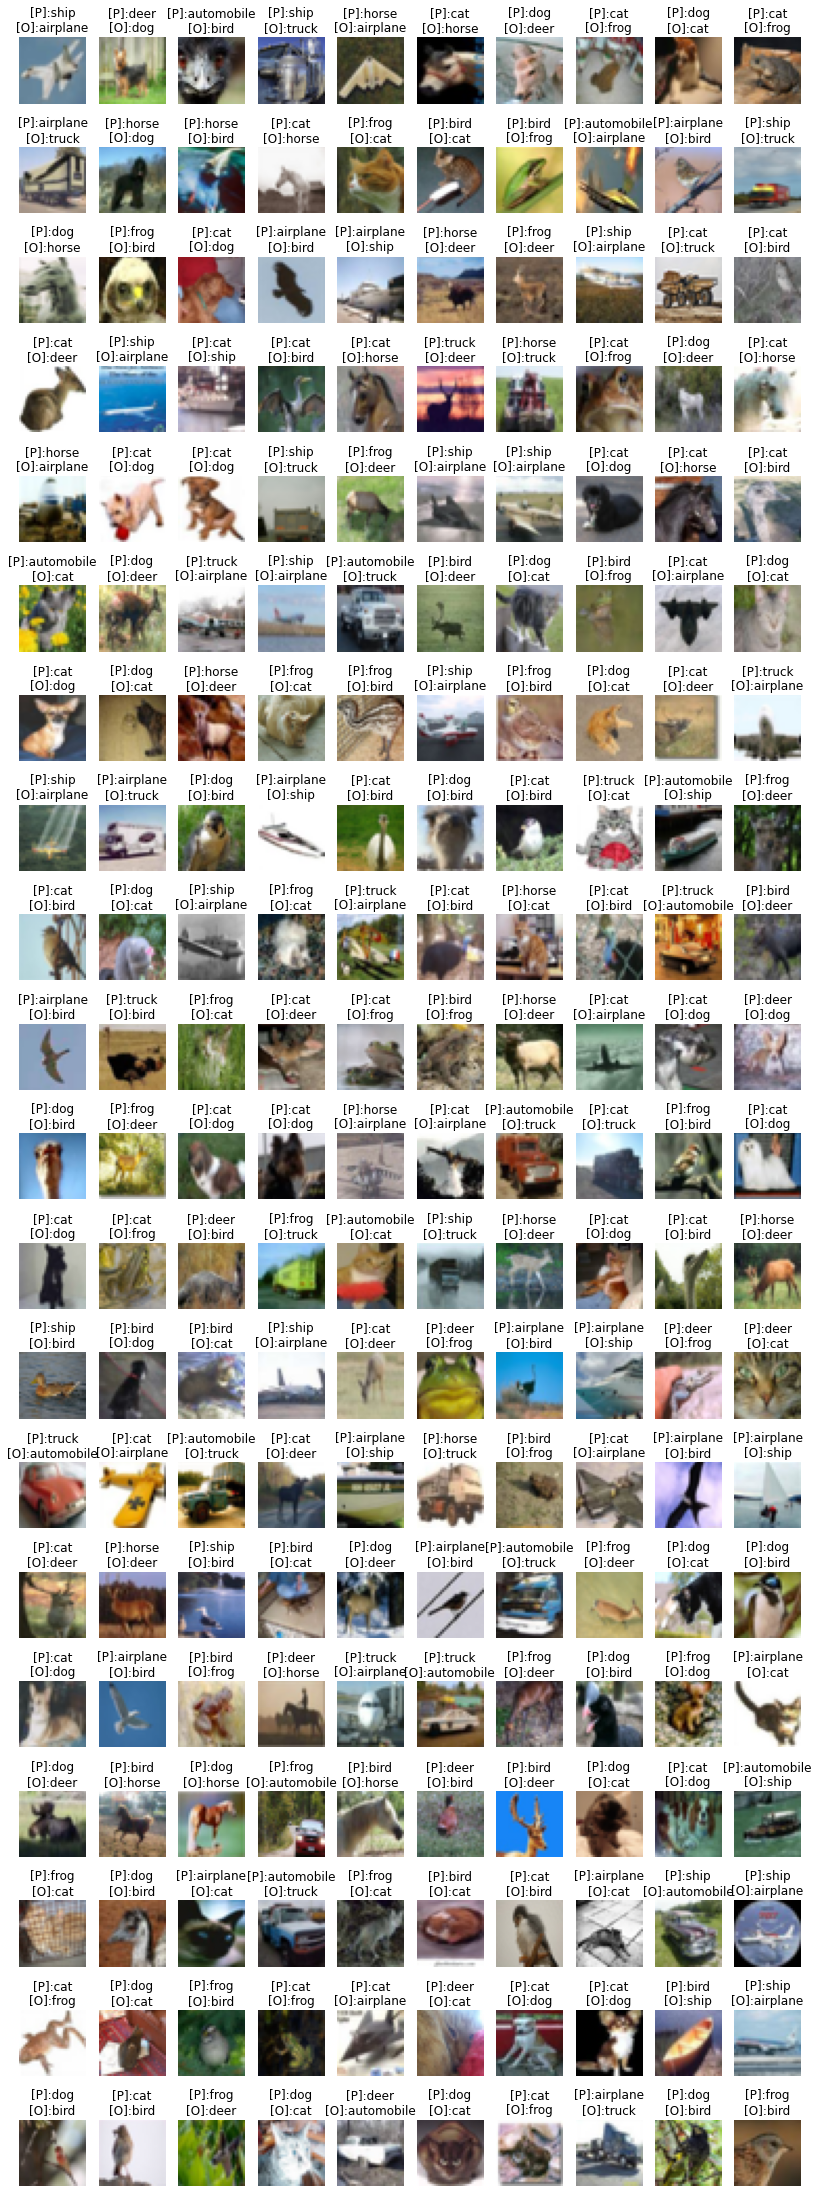

In [12]:
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
# np.nonzero([[0, 2, 0], [0, 0, 3]])
false_pre = pre[idx]
false_label = y_test_r[idx] 
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[P]:{}\n[O]:{}".format(names[false_pre[i]], names[false_label[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

In [ ]:
import requests
url = input('輸入網址:')
response = requests.get(url, verify = False, stream = True)
img = Image.open(response.raw)
image.resize((32,32)).convert('RGB')
img_norm = np.array([img]) / 255
pre = model.predict(img_norm)[0]
for n, p in zip(names, pre):
    print(n, "的機率:", round(p, 3))
plt.imshow(img)